# Code to check the TRILEGAL population for too many repeating stars

In [ ]:
#Necessary Modules 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

First we cut the final sample down to just include the G stars and be as consistent with the Shibayama (2013) model as possible, as this is what we are tryin to replicate. 

In [179]:
#Cut the final sample down to only include the g stars (Shibayama 2013)
g_stars = pd.read_csv('/Users/Jess/699-2/final_github_code/final_sample.csv')
g_stars = g_stars[(g_stars["logTe"] >= np.log10(5100)) & (g_stars["logTe"] <= np.log10(6000)) & (g_stars['logg'] >= 4)]   
print('There are ' + str(len(g_stars)) + ' in the final TRILEGAL g population.')
print('There are 80000 stars in the Shibayama (2013) population.')

There are 82396 in the final TRILEGAL g population.
There are 80000 stars in the Shibayama (2013) population.


The first test is to find out how many stars are repeated more than once, if none are, then no more tests are necessary.

In [105]:
#Find out how many stars are repeated more than once
repeats = g_stars[g_stars.duplicated(keep=False)]
repeats = repeats['Index']
repeats = list(repeats)
print(str(len(repeats)) + ' stars appear more than once in the g star population.')
print(str(round((len(repeats)/len(g_stars))*100, 2)) + '% of stars appear more than once in this sample.')

59465 stars appear more than once in the g star population.
72.17% of stars appear more than once in this sample.


Because stars are repeated more than once we can find the largest number of repeats. Too many repeats is obviously worse than one or two.

In [109]:
#Find out how many repeats occur for each star
my_dict = {i:repeats.count(i) for i in repeats}
D = my_dict
print('The star of index ' + str(max(D, key=D.get)) + ' repeats the most with ' + str(D[max(D, key=D.get)]) + ' repeats.') 

The star of index 2201014.0 repeats the most with 114 repeats.


How we can plot a distribution of the number of stars which repeat as a function of how many times they repeat.

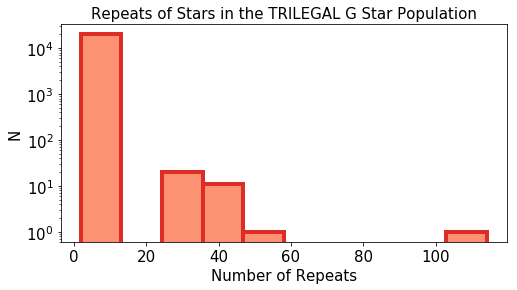

In [117]:
#Find the distribution of repeats in the sample
all_values = []
for i in D.values():
    all_values.append(i)
all_values.sort(reverse=True)
a = np.sort(all_values)

plt.figure(figsize=(8, 4))
plt.hist(a, color='#fc9272', edgecolor='#de2d26', linewidth=4)
plt.yscale('log')
plt.ylabel('N', fontsize=15)
plt.xlabel('Number of Repeats', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Repeats of Stars in the TRILEGAL G Star Population', fontsize=15)
plt.savefig('/Users/Jess/699-2/final_plots/repeats_hist.png')
plt.show()

The following few plots look at the HR diagrams of the sample, with color representing the number of repeats. This shows if there are any high repeating stars, that they hopefully do not lie within the area of interest. 

In [121]:
#Separate indices and repeats into separate lists 
indices = list(my_dict.keys())
repeats = list(my_dict.values())
(indices, repeats) = zip(*my_dict.items())

In [181]:
#Look at where repeats are in the parameter space by plotting them on an asteroseismic HR diagram
temps = []
logg = []
for i in indices:
    t = g_stars.loc[g_stars['Index'] == i, 'logTe'].iloc[0]
    l = g_stars.loc[g_stars['Index'] == i, 'logg'].iloc[0]
    temps.append(t)
    logg.append(l)

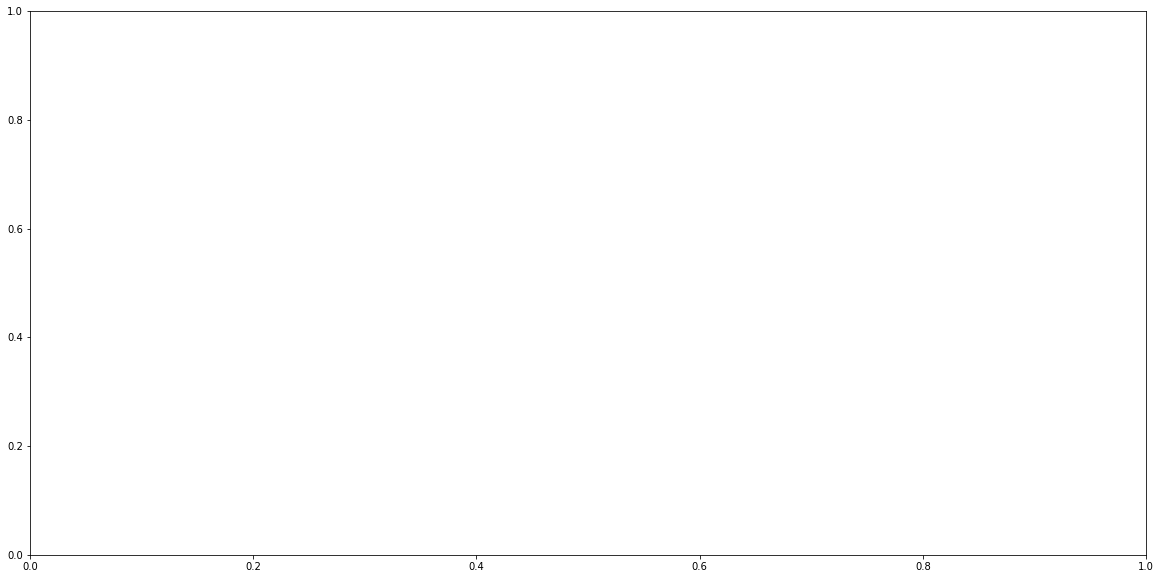

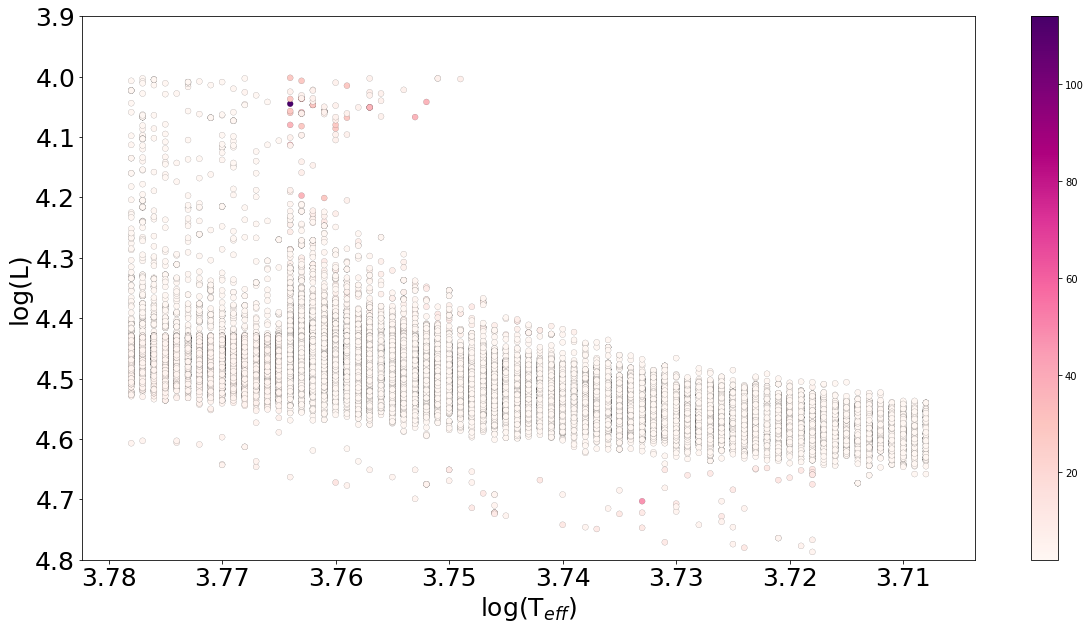

In [182]:
plt.figure(figsize=(20, 10))
plt.scatter(temps, logg, c=repeats, cmap='RdPu', edgecolor='black', linewidth=0.1)
plt.xlim(max(temps)+np.log10(1.01), min(temps)-np.log10(1.01))
plt.colorbar()
plt.ylabel('log(L)', fontsize=25)
plt.xlabel(r'log(T$_{eff}$)', fontsize=25)
plt.ylim(4.8, 3.9)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig('/Users/Jess/699-2/final_plots/g_repeats_hr_all.png')
plt.show()

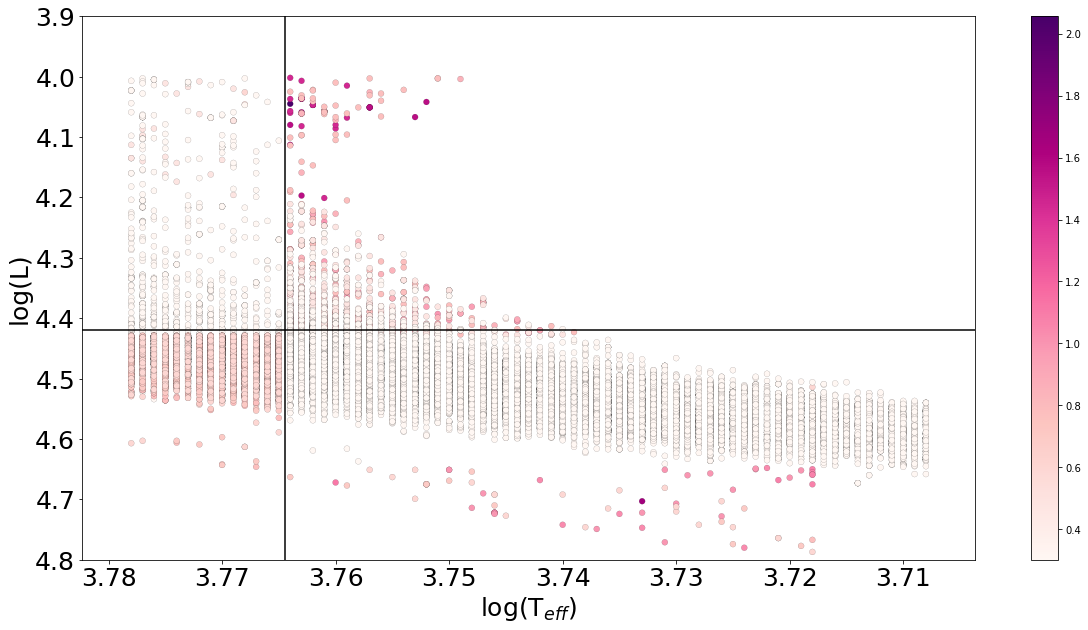

In [183]:
plt.figure(figsize=(20, 10))
plt.scatter(temps, logg, c=np.log10(repeats), cmap='RdPu', edgecolor='black', linewidth=0.1)
plt.xlim(max(temps)+np.log10(1.01), min(temps)-np.log10(1.01))
plt.colorbar()
plt.ylabel('log(L)', fontsize=25)
plt.xlabel(r'log(T$_{eff}$)', fontsize=25)
plt.ylim(4.8, 3.9)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.axvline(3.7645, color='black')
plt.axhline(4.42, color='black')
plt.savefig('/Users/Jess/699-2/final_sample_files/g_repeats_hr_all_log.png')
plt.show()

The following plots will display the samples in histograms with one another to detemine if any abnormalities in the data are to do with the comparison of samples itself.

In [ ]:
mathur_teff = pd.read_csv('/Users/Jess/699-2/mathur_2017/mathur_2017_edited.txt', delimiter='|')['Teff']
mathur_logg = pd.read_csv('/Users/Jess/699-2/mathur_2017/mathur_2017_edited.txt', delimiter='|')['log(g)']
mathur_mag = pd.read_csv('/Users/Jess/699-2/mathur_2017/mathur_master.txt')['kepmag']

In [ ]:
trilegal_teff = pd.read_csv('/Users/Jess/699-2/trilegal_data/trilegal_master_with_index.csv')['logTe']
trilegal_logg = pd.read_csv('/Users/Jess/699-2/trilegal_data/trilegal_master_with_index.csv')['logg']
trilegal_mag = pd.read_csv('/Users/Jess/699-2/trilegal_data/trilegal_master_with_index.csv')['Kepler']

In [ ]:
temp = pd.read_csv('/Users/Jess/699-2/final_github_code/final_sample.csv')['logTe']
logg = pd.read_csv('/Users/Jess/699-2/final_github_code/final_sample.csv')['logg']
mag = pd.read_csv('/Users/Jess/699-2/final_github_code/final_sample.csv')['Kepler']

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.hist(np.log10(mathur_teff), histtype='step', label="Mathur (2017)", color='green')
plt.hist(trilegal_teff, histtype='step', label='Full TRILEGAL Sample', color='red')
plt.hist(temp, histtype='step', label='New Stellar Population', color='blue')
plt.axvline(3.7645, color='black')
plt.yscale('log')
plt.ylabel('N', fontsize=15)
plt.xlabel(r'log$(T_{eff})$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(122)
plt.hist(mathur_logg, histtype='step', label="Mathur (2017)", color='green')
plt.hist(trilegal_logg, histtype='step', label='Full TRILEGAL Sample', color='red')
plt.hist(logg, histtype='step', label='New Stellar Population', color='blue')
plt.legend(fontsize=15)
plt.yscale('log')
plt.ylabel('N', fontsize=15)
plt.xlabel('log(g)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(4.42, color='black')
plt.show()